In [2]:
import re
import numpy as np
import pandas as pd

# remove english stopwords with the help of the gensim library 
from gensim.parsing.preprocessing import remove_stopwords

import string

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)


# cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

# cleaning and removing mentions 
def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

# removing emojis 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

stemmer = PorterStemmer()

def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])

lemmatizer = WordNetLemmatizer()

def lematize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])

In [59]:
def preprocessing(df):
    # cleaning and removing URLs
    df = df.apply(lambda x: cleaning_URLs(x))
    df = df.apply(lambda x: remove_hyperlink(x))
    print("Cleaned and removed the URLs and hyperlinks.")
    
    # cleaning and removing mentions 
    df = df.apply(lambda x: remove_mentions(x))
    print("Cleaned and removed the mentions.")
    
    # write new csv file containing the preprocessed dataset
    return df

In [28]:
# loading the dataset 
df = pd.read_csv('datasets/sentiment_chatgpt.csv', usecols=['user_name','user_description',"clean_tweets", "tweets",'label', 'date'])

In [29]:
df

,user_name,user_description,tweets,clean_tweets,label,date
0,bilal haidar,building draftmateai developer author chatgpt ...,I'm happy to share with you that @draftmateai ...,happy share draftmateai support day free trial...,positiv,2023-04-26 13:02:16+00:00
1,josh arrington,nomadic marketing vigilante graphic web design...,🤖 - Integrate ChatGPT into your Marketo Smart ...,integrate chatgpt marketo smart campaign disco...,positiv,2023-04-26 13:02:06+00:00
2,smartling,leading translation management platform locali...,We’re pleased to announce new patent-pending t...,pleased announce new patentpending technology ...,neutral,2023-04-26 13:02:05+00:00
3,richard,engineering leader coach mentor building remot...,Starting to tire of being scolded by ChatGPT f...,starting tire scolded chatgpt slight perceived...,neutral,2023-04-26 13:02:00+00:00
4,lockroca,stop learning research develop uild future eyo...,@SpartaJustice It's notable that wikipedia ent...,spartajustice it notable wikipedia entry john ...,positiv,2023-04-26 13:01:52+00:00
...,...,...,...,...,...,...
357643,nenu,brain meant processing million tweet post vide...,"ChatGPT is the biggest, smartest brain 🧠 in th...",chatgpt biggest smartest brain world right now...,neutral,2022-12-05 17:11:10+00:00
357644,iamtmoyo,blockchain enthusiast philanthropist slave jav...,"Levels🙏🙏🙏,so happy for the chatGPT team for co...",levelsso happy chatgpt team com revolutionary ...,neutral,2022-12-05 17:10:31+00:00
357645,gabriel furstenheim,mathematician developer amazon previously geob...,Russel vs ChatGPT. It's also funny that it tak...,russel chatgpt it funny take long time answer ...,negativ,2022-12-05 17:09:04+00:00
357646,devang,passionate nature software developer profession,Was just wondering is there any difference bet...,wondering difference jasper chatgpt gpt chatgp...,negativ,2022-12-05 17:08:44+00:00


## Classification tweets into scientists 

In [30]:
len(df)

357648

In [31]:
df.isnull().values.any()
df.isnull().sum()

user_name           0
user_description    0
tweets              0
clean_tweets        0
label               0
date                0
dtype: int64

In [32]:
name = df.user_name

In [33]:
descr = df.user_description

In [34]:
descr_list = ['scientist']

In [35]:
word_list = ['phd']

In [36]:
scientist = (name.str.contains('|'.join(word_list), case=False)) & (descr.str.contains('|'.join(descr_list), case=False))

In [37]:
#scientist = (name.str.contains('|'.join(word_list), case=False))

In [38]:
result = df[scientist]

In [39]:
result

,user_name,user_description,tweets,clean_tweets,label,date
666,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,positiv,2023-04-26 09:42:01+00:00
2068,jason moore phd,chair department computational biomedicine ced...,‘As an AI language model’: the phrase that sho...,language model phrase show polluting web chatgpt,negativ,2023-04-25 22:25:37+00:00
2610,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,positiv,2023-04-25 19:42:00+00:00
2825,jennifer kwan phd,physician scientist cardiologist yale working ...,@bchesky @airbnb discusses navigating pandemic...,bchesky airbnb discus navigating pandemic deci...,neutral,2023-04-25 18:31:36+00:00
5074,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,positiv,2023-04-25 05:42:01+00:00
...,...,...,...,...,...,...
353955,tommaso urli phd,optimisation scientist migrant programmer lear...,@diegobetto Brought to you by #ChatGPT,diegobetto brought chatgpt,negativ,2022-12-06 07:49:52+00:00
355764,matt tenan phd atc,physiologist data scientist program director h...,Nope #ChatGPT has drank all the Kool-aid. Go h...,nope chatgpt drank koolaid home chatbot youre ...,negativ,2022-12-05 23:41:09+00:00
355841,matt tenan phd atc,physiologist data scientist program director h...,Show me the citations #ChatGPT! https://t.co/8...,citation chatgpt,negativ,2022-12-05 23:25:05+00:00
355986,phd hire,scientist giving free career advice hope acade...,Is academia ready for #ChatGPT? Are students w...,academia ready chatgpt student writing paper t...,positiv,2022-12-05 22:51:26+00:00


In [40]:
len(result)

175

## Sentiment analysis 

In [17]:
!pip install transformers

In [19]:
!pip install sentencepiece

In [20]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

MODEL = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\Ajkuna Seipi\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Ajkuna Seipi\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [41]:
sentences = list(result.tweets)

pred = []
# Perform sentiment analysis for each sentence
for i, text in enumerate(sentences):
    text = preprocess(text)
    encoded_input = tokenizer(text, return_tensors='pt')
    output = model(**encoded_input)
    scores = output.logits.detach().numpy()
    scores = softmax(scores)

    # Get label with highest score
    highest_score_label = config.id2label[np.argmax(scores)]

    # Print the label with highest score
    #print(f"Sentence {i+1}: {text}")
    #print(f"Highest score label: {highest_score_label}")
    #print()
    pred.append(highest_score_label)

result.label = pred
result.to_csv('datasets/sentiment_scientist.csv')

C:\Users\Ajkuna Seipi\AppData\Local\Temp\ipykernel_15204\4066806318.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.label = pred


In [42]:
user = result.drop_duplicates(subset=['user_name'])

In [43]:
len(user) # We have approximately 692 scientists (postdoctoral, professor and PhDs in every fields)

77

In [44]:
result.label.value_counts()

neutral     89
positive    54
negative    32
Name: label, dtype: int64

In [45]:
result

,user_name,user_description,tweets,clean_tweets,label,date
666,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,negative,2023-04-26 09:42:01+00:00
2068,jason moore phd,chair department computational biomedicine ced...,‘As an AI language model’: the phrase that sho...,language model phrase show polluting web chatgpt,neutral,2023-04-25 22:25:37+00:00
2610,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,negative,2023-04-25 19:42:00+00:00
2825,jennifer kwan phd,physician scientist cardiologist yale working ...,@bchesky @airbnb discusses navigating pandemic...,bchesky airbnb discus navigating pandemic deci...,neutral,2023-04-25 18:31:36+00:00
5074,michael phd,chief strategist pro senior research fellow da...,Did you know that ChatGPT is actually NOT so i...,know chatgpt actually innovative work then it ...,negative,2023-04-25 05:42:01+00:00
...,...,...,...,...,...,...
353955,tommaso urli phd,optimisation scientist migrant programmer lear...,@diegobetto Brought to you by #ChatGPT,diegobetto brought chatgpt,neutral,2022-12-06 07:49:52+00:00
355764,matt tenan phd atc,physiologist data scientist program director h...,Nope #ChatGPT has drank all the Kool-aid. Go h...,nope chatgpt drank koolaid home chatbot youre ...,negative,2022-12-05 23:41:09+00:00
355841,matt tenan phd atc,physiologist data scientist program director h...,Show me the citations #ChatGPT! https://t.co/8...,citation chatgpt,neutral,2022-12-05 23:25:05+00:00
355986,phd hire,scientist giving free career advice hope acade...,Is academia ready for #ChatGPT? Are students w...,academia ready chatgpt student writing paper t...,positive,2022-12-05 22:51:26+00:00


In [48]:
positive = result[result.label == 'positive']
negative = result[result.label == 'negative']

## Topic modeling

In [46]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit

    
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

In [49]:
# topic modelling 

def get_topic(text): 
    tokenized_inputs = []
    for sentence in text:
        tokens = tokenizer(sentence, return_tensors='pt')
        tokenized_inputs.append(tokens)
        
    predictions = []
    for tokens in tokenized_inputs:
        output = model(**tokens)
        scores = output.logits[0].detach().numpy()
        scores = expit(scores)
        sentence_predictions = (scores >= 0.5) * 1
        predictions.append(sentence_predictions)
        
    classes = []
    for sentence_predictions in predictions:
        for i in range(len(sentence_predictions)):
            if sentence_predictions[i]:
                classes.append(class_mapping[i])
                
    return classes

### In general

In [50]:
from collections import Counter

# topic modelling for positive tweets
print("tweets topic modelling : ")
tweets = list(result.tweets)
classes = get_topic(tweets)

string_counts = Counter(classes)

map_result = {}
for string, count in string_counts.items():
    map_result[string] = count
    print(f"Class: {string}, Count: {count}")

map_result = sorted(map_result.items(), key=lambda x: x[1])

tweets topic modelling : 
Class: science_&_technology, Count: 78
Class: business_&_entrepreneurs, Count: 8
Class: news_&_social_concern, Count: 31
Class: food_&_dining, Count: 3
Class: travel_&_adventure, Count: 10
Class: fitness_&_health, Count: 11
Class: diaries_&_daily_life, Count: 11
Class: learning_&_educational, Count: 34
Class: youth_&_student_life, Count: 7
Class: film_tv_&_video, Count: 4
Class: family, Count: 2
Class: relationships, Count: 1
Class: arts_&_culture, Count: 4
Class: celebrity_&_pop_culture, Count: 1
Class: other_hobbies, Count: 1
Class: sports, Count: 1


In [51]:
map_result

[('relationships', 1),
 ('celebrity_&_pop_culture', 1),
 ('other_hobbies', 1),
 ('sports', 1),
 ('family', 2),
 ('food_&_dining', 3),
 ('film_tv_&_video', 4),
 ('arts_&_culture', 4),
 ('youth_&_student_life', 7),
 ('business_&_entrepreneurs', 8),
 ('travel_&_adventure', 10),
 ('fitness_&_health', 11),
 ('diaries_&_daily_life', 11),
 ('news_&_social_concern', 31),
 ('learning_&_educational', 34),
 ('science_&_technology', 78)]

### Positive tweets

In [52]:
from collections import Counter

# topic modelling for positive tweets
print("tweets topic modelling : ")
tweets = list(positive.tweets)
classes = get_topic(tweets)

string_counts = Counter(classes)

map_pos = {}
for string, count in string_counts.items():
    map_pos[string] = count
    print(f"Class: {string}, Count: {count}")

map_pos = sorted(map_pos.items(), key=lambda x: x[1])

tweets topic modelling : 
Class: science_&_technology, Count: 22
Class: fitness_&_health, Count: 5
Class: learning_&_educational, Count: 13
Class: diaries_&_daily_life, Count: 4
Class: youth_&_student_life, Count: 3
Class: news_&_social_concern, Count: 7
Class: film_tv_&_video, Count: 1
Class: arts_&_culture, Count: 1
Class: business_&_entrepreneurs, Count: 1


In [53]:
map_pos

[('film_tv_&_video', 1),
 ('arts_&_culture', 1),
 ('business_&_entrepreneurs', 1),
 ('youth_&_student_life', 3),
 ('diaries_&_daily_life', 4),
 ('fitness_&_health', 5),
 ('news_&_social_concern', 7),
 ('learning_&_educational', 13),
 ('science_&_technology', 22)]

### Negative tweets

In [55]:
from collections import Counter

# topic modelling for positive tweets
print("tweets topic modelling : ")
tweets = list(negative.tweets)
classes = get_topic(tweets)

string_counts = Counter(classes)

map_neg = {}
for string, count in string_counts.items():
    map_neg[string] = count
    print(f"Class: {string}, Count: {count}")

map_neg = sorted(map_neg.items(), key=lambda x: x[1])

tweets topic modelling : 
Class: science_&_technology, Count: 18
Class: learning_&_educational, Count: 4
Class: news_&_social_concern, Count: 8
Class: fitness_&_health, Count: 2
Class: diaries_&_daily_life, Count: 1
Class: other_hobbies, Count: 1


In [56]:
map_neg

[('diaries_&_daily_life', 1),
 ('other_hobbies', 1),
 ('fitness_&_health', 2),
 ('learning_&_educational', 4),
 ('news_&_social_concern', 8),
 ('science_&_technology', 18)]

## Emotions analysis 

In [57]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


## In general 

In [60]:
tweets = preprocessing(result.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the mentions.


In [61]:
emotions = []
for sentence in list(tweets):
    emotion_labels = emotion(sentence)
    emotions.append(emotion_labels[0]['label'])

In [62]:
from collections import Counter

emotions_counts = Counter(emotions)

map_emo = {}
for string, count in emotions_counts.items():
    map_emo[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_map = sorted(map_emo.items(), key=lambda x: x[1])

Class: neutral, Count: 63
Class: approval, Count: 25
Class: admiration, Count: 20
Class: realization, Count: 12
Class: surprise, Count: 9
Class: curiosity, Count: 18
Class: disapproval, Count: 2
Class: confusion, Count: 7
Class: excitement, Count: 3
Class: fear, Count: 4
Class: amusement, Count: 3
Class: joy, Count: 2
Class: sadness, Count: 1
Class: caring, Count: 1
Class: gratitude, Count: 1
Class: optimism, Count: 2
Class: pride, Count: 1
Class: disappointment, Count: 1


In [63]:
sorted_map

[('sadness', 1),
 ('caring', 1),
 ('gratitude', 1),
 ('pride', 1),
 ('disappointment', 1),
 ('disapproval', 2),
 ('joy', 2),
 ('optimism', 2),
 ('excitement', 3),
 ('amusement', 3),
 ('fear', 4),
 ('confusion', 7),
 ('surprise', 9),
 ('realization', 12),
 ('curiosity', 18),
 ('admiration', 20),
 ('approval', 25),
 ('neutral', 63)]

### Positive 

In [64]:
tweets = preprocessing(positive.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the mentions.


In [65]:
emotions = []
for sentence in list(tweets):
    emotion_labels = emotion(sentence)
    emotions.append(emotion_labels[0]['label'])

In [66]:
from collections import Counter

emotions_counts = Counter(emotions)

map_emopos = {}
for string, count in emotions_counts.items():
    map_emopos[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_mappos = sorted(map_emopos.items(), key=lambda x: x[1])

Class: admiration, Count: 19
Class: realization, Count: 3
Class: approval, Count: 11
Class: neutral, Count: 4
Class: excitement, Count: 2
Class: curiosity, Count: 3
Class: amusement, Count: 3
Class: joy, Count: 2
Class: caring, Count: 1
Class: gratitude, Count: 1
Class: optimism, Count: 2
Class: surprise, Count: 2
Class: pride, Count: 1


In [67]:
sorted_mappos

[('caring', 1),
 ('gratitude', 1),
 ('pride', 1),
 ('excitement', 2),
 ('joy', 2),
 ('optimism', 2),
 ('surprise', 2),
 ('realization', 3),
 ('curiosity', 3),
 ('amusement', 3),
 ('neutral', 4),
 ('approval', 11),
 ('admiration', 19)]

### Negative 

In [68]:
tweets = preprocessing(negative.tweets)

Cleaned and removed the URLs and hyperlinks.
Cleaned and removed the mentions.


In [69]:
emotions = []
for sentence in list(tweets):
    emotion_labels = emotion(sentence)
    emotions.append(emotion_labels[0]['label'])

In [70]:
from collections import Counter

emotions_counts = Counter(emotions)

map_emoneg = {}
for string, count in emotions_counts.items():
    map_emoneg[string] = count
    print(f"Class: {string}, Count: {count}")

sorted_mapneg = sorted(map_emoneg.items(), key=lambda x: x[1])

Class: neutral, Count: 11
Class: surprise, Count: 3
Class: realization, Count: 5
Class: confusion, Count: 3
Class: fear, Count: 4
Class: admiration, Count: 1
Class: sadness, Count: 1
Class: approval, Count: 2
Class: curiosity, Count: 1
Class: disappointment, Count: 1


In [71]:
sorted_mapneg

[('admiration', 1),
 ('sadness', 1),
 ('curiosity', 1),
 ('disappointment', 1),
 ('approval', 2),
 ('surprise', 3),
 ('confusion', 3),
 ('fear', 4),
 ('realization', 5),
 ('neutral', 11)]

## Visualizations

### Sentiment analysis 

In [72]:
result.isnull().values.any()
result.isnull().sum()

user_name           0
user_description    0
tweets              0
clean_tweets        0
label               0
date                0
dtype: int64

In [86]:
result.label.value_counts()

neutral     89
positive    54
negative    32
Name: label, dtype: int64

In [73]:
df_sorted = result.sort_values(by='date')

In [74]:
# from december to april
df_sorted.date = pd.to_datetime(df_sorted.date)

In [75]:
dec = df_sorted[df_sorted.date.dt.month == 12]

In [76]:
jan = df_sorted[df_sorted.date.dt.month == 1]

In [77]:
feb = df_sorted[df_sorted.date.dt.month == 2]

In [78]:
march = df_sorted[df_sorted.date.dt.month == 3]

In [79]:
april = df_sorted[df_sorted.date.dt.month == 4]

In [80]:
dec.label.value_counts()

neutral     11
positive     7
negative     5
Name: label, dtype: int64

In [81]:
jan.label.value_counts()

positive    17
neutral     11
negative     3
Name: label, dtype: int64

In [82]:
feb.label.value_counts()

neutral     21
positive    14
negative     8
Name: label, dtype: int64

In [83]:
march.label.value_counts()

neutral     14
positive     7
negative     4
Name: label, dtype: int64

In [84]:
april.label.value_counts()

neutral     32
negative    12
positive     9
Name: label, dtype: int64

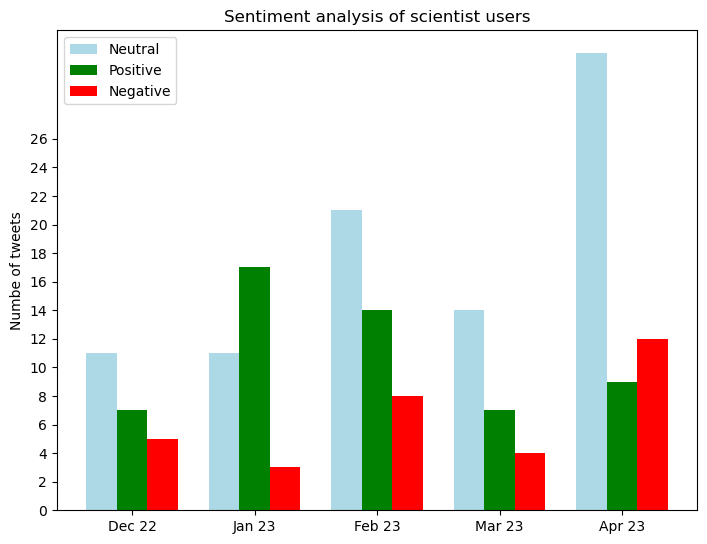

In [92]:
import numpy as np
import matplotlib.pyplot as plt

data = [[11,11, 21, 14, 32], #neutral
[7, 17, 14, 7, 9], #positiv
[5, 3, 8, 4, 12]] #negativ
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X - 0.25, data[0], color = 'lightblue', width = 0.25)
ax.bar(X , data[1], color = 'g', width = 0.25)
ax.bar(X + 0.25, data[2], color = 'r', width = 0.25)
ax.set_ylabel('Numbe of tweets')
ax.set_title('Sentiment analysis of scientist users')
ax.set_xticks(X, ('Dec 22', 'Jan 23', 'Feb 23', 'Mar 23', 'Apr 23'))
ax.set_yticks(np.arange(0, 28, 2))
ax.legend(labels=['Neutral', 'Positive', 'Negative'])
plt.show()

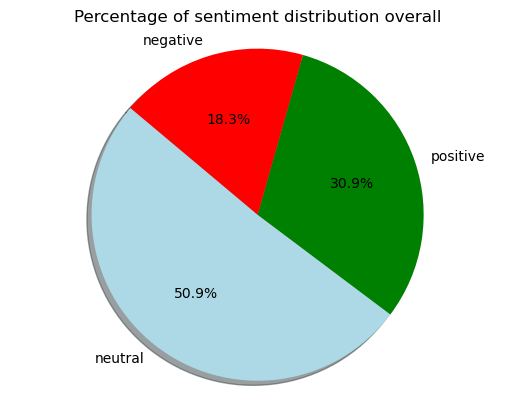

In [87]:
labels = ['neutral', 'positive', 'negative']
sizes = [89, 54, 32]
colors = ['lightblue', 'green', 'red']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)    
plt.axis('equal')
plt.title('Percentage of sentiment distribution overall')
plt.show()

### Topic extraction

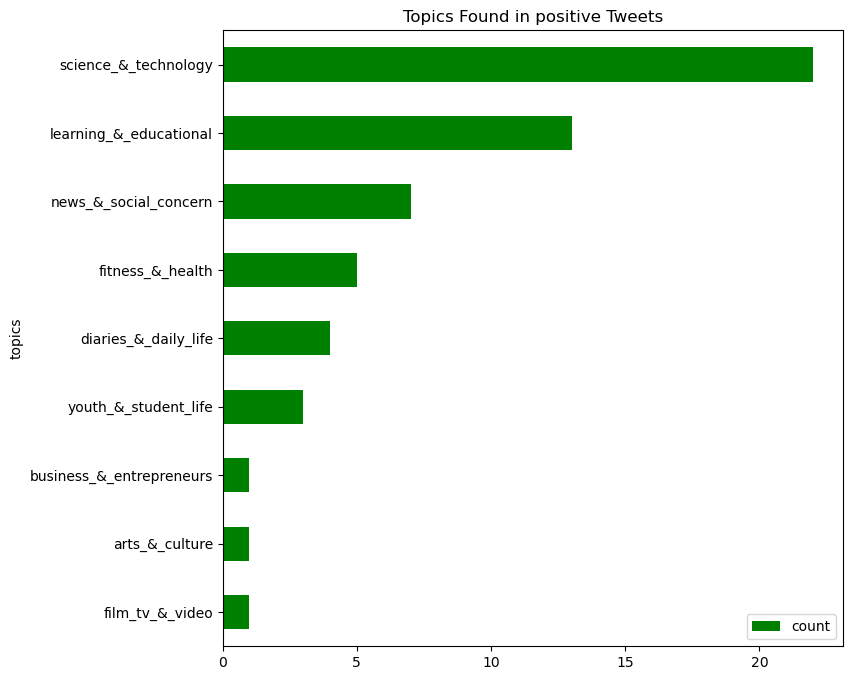

In [88]:
mappos = [('film_tv_&_video', 1),
 ('arts_&_culture', 1),
 ('business_&_entrepreneurs', 1),
 ('youth_&_student_life', 3),
 ('diaries_&_daily_life', 4),
 ('fitness_&_health', 5),
 ('news_&_social_concern', 7),
 ('learning_&_educational', 13),
 ('science_&_technology', 22)]

pos = pd.DataFrame(mappos, columns=['topics', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pos.sort_values(by='count').plot.barh(x='topics',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Topics Found in positive Tweets")

plt.show()

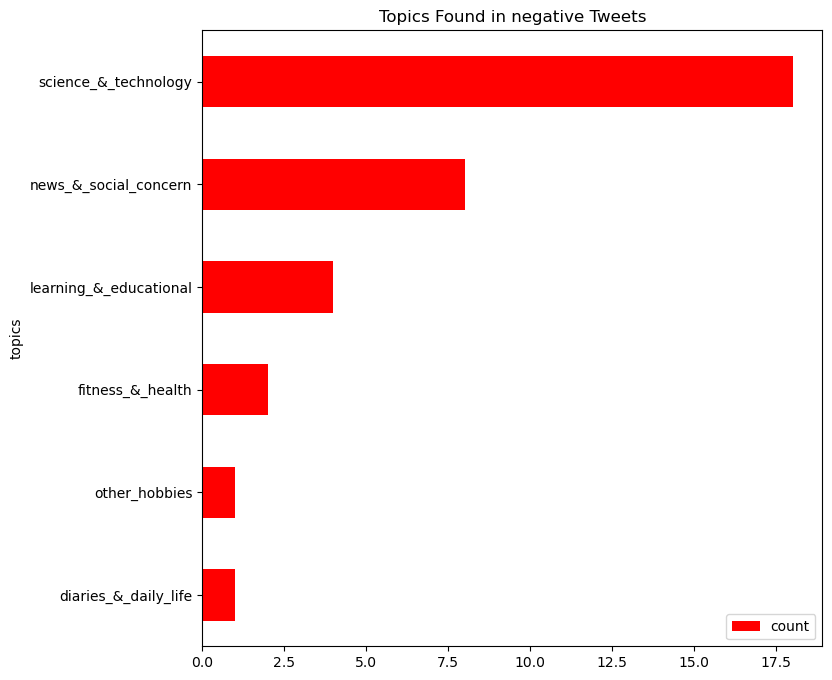

In [89]:
mapneg = [('diaries_&_daily_life', 1),
 ('other_hobbies', 1),
 ('fitness_&_health', 2),
 ('learning_&_educational', 4),
 ('news_&_social_concern', 8),
 ('science_&_technology', 18)]

neg = pd.DataFrame(mapneg, columns=['topics', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
neg.sort_values(by='count').plot.barh(x='topics',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Topics Found in negative Tweets")

plt.show()

### Emotions

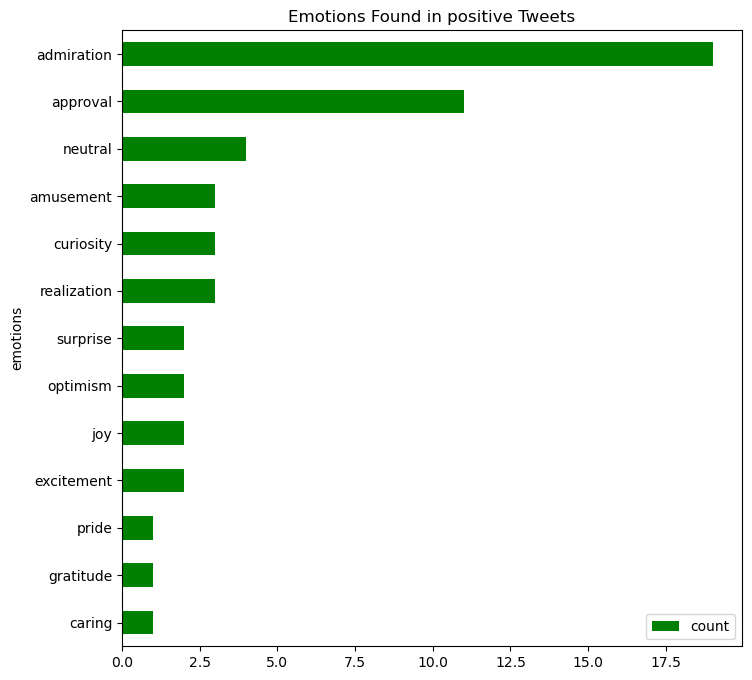

In [90]:
mappos = [('caring', 1),
 ('gratitude', 1),
 ('pride', 1),
 ('excitement', 2),
 ('joy', 2),
 ('optimism', 2),
 ('surprise', 2),
 ('realization', 3),
 ('curiosity', 3),
 ('amusement', 3),
 ('neutral', 4),
 ('approval', 11),
 ('admiration', 19)]

pos = pd.DataFrame(mappos, columns=['emotions', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
pos.sort_values(by='count').plot.barh(x='emotions',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Emotions Found in positive Tweets")

plt.show()

### Negative

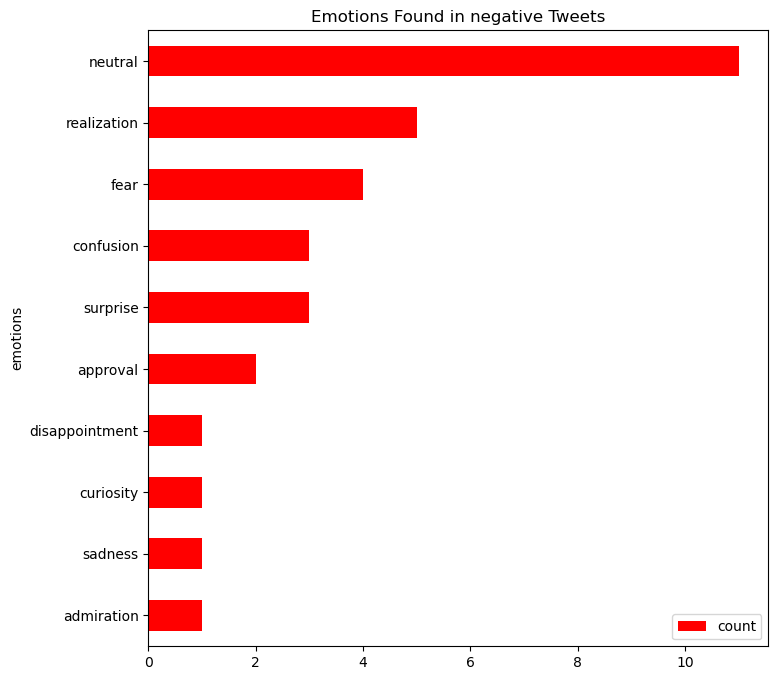

In [91]:
mapneg = [('admiration', 1),
 ('sadness', 1),
 ('curiosity', 1),
 ('disappointment', 1),
 ('approval', 2),
 ('surprise', 3),
 ('confusion', 3),
 ('fear', 4),
 ('realization', 5),
 ('neutral', 11)]

neg = pd.DataFrame(mapneg, columns=['emotions', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
neg.sort_values(by='count').plot.barh(x='emotions',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Emotions Found in negative Tweets")

plt.show()